In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./tachyon/far_data_2024-02-21_clustered.csv')

In [2]:
data

,timestamp,cpu_system,boottime,Pool Size Time_P1,mem_free,Missed Buffers_P1,bytes_out,cpu_user,cpu_idle,Pool Size Data_P1,...,TCPLostRetransmit_rate,TCPForwardRetrans_rate,TotalRetrans,TCPSlowStartRetrans,RPCRetrans,TCPFastRetrans,TCPLostRetransmit,TCPForwardRetrans,RetransSegs,Cluster
0,2024-02-21 05:36:00,2.100000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,1.006667,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,2024-02-21 05:36:15,2.100000,0.000000e+00,2038.710000,0.000000e+00,0.0,0.000000,1.300000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2024-02-21 05:36:30,1.993333,0.000000e+00,2055.490000,0.000000e+00,0.0,0.000000,1.300000,0.0,11795.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2024-02-21 05:36:45,1.806667,0.000000e+00,2049.026000,0.000000e+00,0.0,0.000000,1.300000,0.0,11892.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,2024-02-21 05:37:00,2.100000,1.705514e+09,2014.643333,0.000000e+00,0.0,0.000000,1.110000,0.0,11854.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615581,2024-02-21 23:59:45,1.800000,1.706624e+09,2071.635000,7.869378e+06,0.0,133377.830000,0.000000,55.8,11961.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
615582,2024-02-21 23:59:45,2.950000,1.705514e+09,2067.843333,7.733784e+06,0.0,102922.470000,0.000000,45.7,11944.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
615583,2024-02-21 23:59:45,2.000000,1.705517e+09,2038.708333,7.864299e+06,0.0,119388.031667,1.000000,51.2,11771.550000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
615584,2024-02-21 23:59:45,2.066667,1.705517e+09,2061.193333,7.175380e+06,0.0,156884.440000,0.000000,53.7,11903.950000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
data.columns

Index(['timestamp', 'cpu_system', 'boottime', 'Pool Size Time_P1', 'mem_free',
       'Missed Buffers_P1', 'bytes_out', 'cpu_user', 'cpu_idle',
       'Pool Size Data_P1', 'pkts_out', 'load_fifteen', 'part_max_used',
       'load_five', 'mem_shared', 'swap_free', 'Pool Size Events_P1',
       'mem_total', 'load_one', 'mem_cached', 'mem_buffers', 'pkts_in',
       'cpu_speed', 'bytes_in', 'cpu_wio', 'cpu_nice', 'disk_free',
       'disk_total', 'cpu_aidle', 'proc_total', 'swap_total', 'proc_run',
       'cpu_num', 'nodeId', 'RPCRetrans_rate', 'TotalRetrans_rate',
       'TCPSlowStartRetrans_rate', 'TCPFastRetrans_rate', 'RetransSegs_rate',
       'TCPLostRetransmit_rate', 'TCPForwardRetrans_rate', 'TotalRetrans',
       'TCPSlowStartRetrans', 'RPCRetrans', 'TCPFastRetrans',
       'TCPLostRetransmit', 'TCPForwardRetrans', 'RetransSegs', 'Cluster'],
      dtype='object')

In [4]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [5]:
data['nodeId'].unique().shape

(195,)

In [6]:
time_series = []
for node_id in data['nodeId'].unique():
    ts = data[data['nodeId'] == node_id].reset_index(drop=True)
    time_series.append(ts)

In [7]:
# Check if all time series are sampled at the same rate
sampling_intervals = []
for ts in time_series:
    intervals = ts['timestamp'].diff().dropna().dt.total_seconds()
    sampling_intervals.append(intervals.value_counts().index[0] if not intervals.empty else None)

print("Sampling intervals (in seconds) for each time series:", sampling_intervals)
print("All same rate:", len(set(sampling_intervals)) == 1)

Sampling intervals (in seconds) for each time series: [np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float64(15.0), np.float6

In [8]:
for i in range(len(time_series)):
    print(len(time_series[i]), time_series[i]['nodeId'].unique()[0], time_series[i]['Cluster'].unique())

4416 novadaq-far-farm-38 [3]
4405 novadaq-far-farm-22 [3]
4391 novadaq-far-farm-33 [3]
4370 novadaq-far-farm-184 [2]
4369 novadaq-far-farm-42 [3]
4348 novadaq-far-farm-157 [0]
4343 novadaq-far-farm-75 [1]
4341 novadaq-far-farm-20 [2]
4314 novadaq-far-farm-139 [0]
4296 novadaq-far-farm-196 [0]
4293 novadaq-far-farm-152 [0]
4266 novadaq-far-farm-168 [0]
4261 novadaq-far-farm-162 [0]
4258 novadaq-far-farm-83 [1]
4241 novadaq-far-farm-88 [1]
4235 novadaq-far-farm-175 [0]
4217 novadaq-far-farm-61 [2]
4199 novadaq-far-farm-169 [0]
4183 novadaq-far-farm-45 [3]
4170 novadaq-far-farm-85 [1]
4161 novadaq-far-farm-72 [1]
4144 novadaq-far-farm-69 [1]
4141 novadaq-far-farm-36 [3]
4121 novadaq-far-farm-99 [1]
4109 novadaq-far-farm-176 [0]
4094 novadaq-far-farm-59 [2]
4088 novadaq-far-farm-26 [3]
4087 novadaq-far-farm-173 [0]
4070 novadaq-far-farm-47 [3]
4061 novadaq-far-farm-35 [2]
4035 novadaq-far-farm-148 [0]
4021 novadaq-far-farm-155 [0]
4004 novadaq-far-farm-17 [3]
3989 novadaq-far-farm-192 [0]


In [9]:
import matplotlib.pyplot as plt

In [51]:
series_0 = [data for data in time_series if data['Cluster'].unique()[0] == 0]

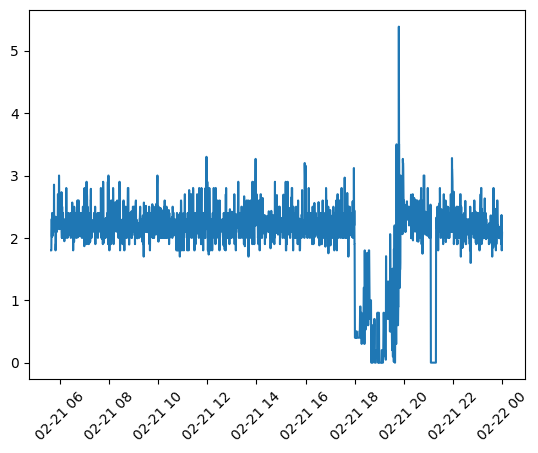

In [18]:
plt.plot(time_series[1]['timestamp'], time_series[1]['cpu_system'])
plt.xticks(rotation=45)
plt.show()

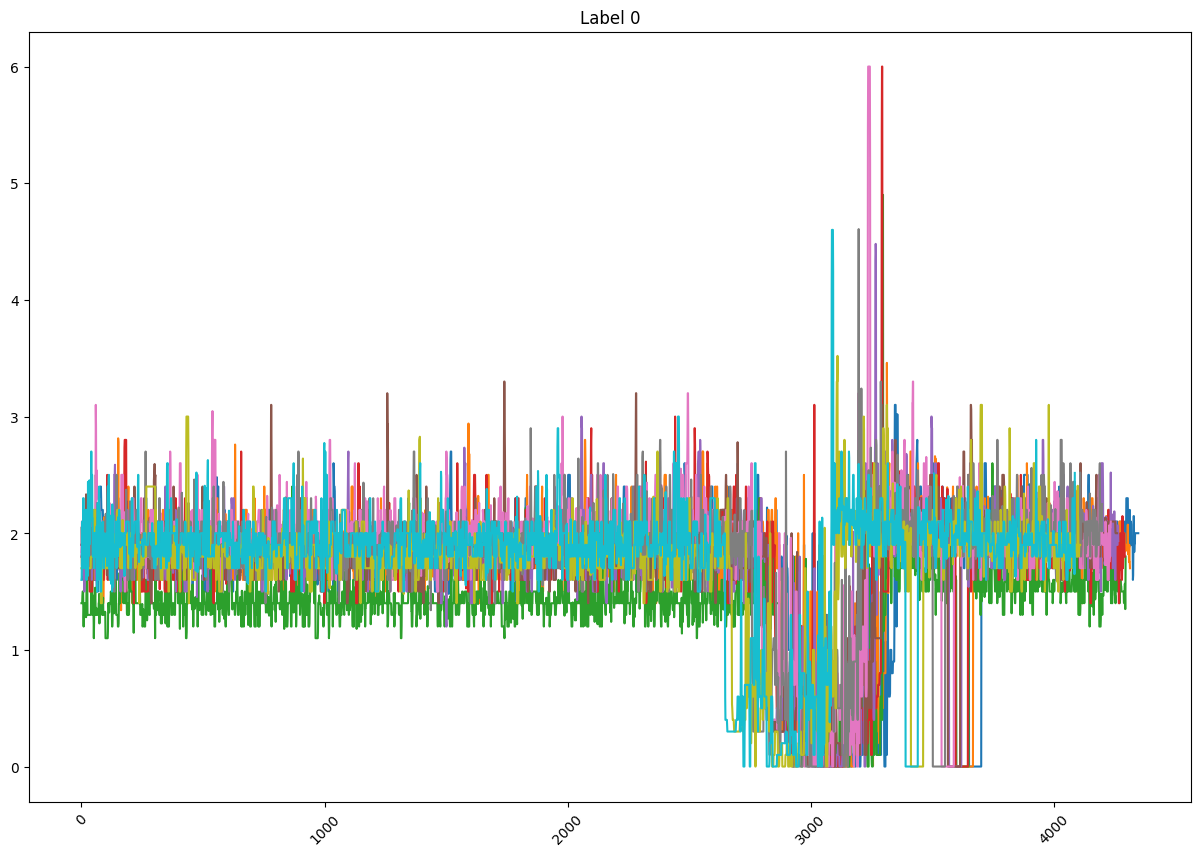

In [73]:
fig = plt.figure(figsize=(15, 10))
for i in range(10):
    plt.plot(series_0[i]['cpu_system'])
    plt.xticks(rotation=45)
plt.title(f"Label 0")
plt.show()

In [42]:
# segmentation
def segment_time_series(series, segment_length = 600, step = 350):
    
    n = len(series)
    # Number of complete segments
    num_segments = n // step
    # Segment the series and assign the label to each segment
    segments = [
        series[i * step:i * step + segment_length:4].reset_index(drop=False)
        for i in range(num_segments) if i * step + segment_length < n
    ]
    return segments

In [62]:
segments = []
labels = []
for i in range(len(time_series)):
    # Segment the time series for each node
    segments_i = segment_time_series(time_series[i])
    label = segments_i[0]['Cluster'].unique()[0]  # Get the label from the first segment
    # extend labels with the same label for all segments
    labels.extend([label] * len(segments_i))
    segments.extend(segments_i)

In [63]:
len(labels)

1517

In [64]:
len(segments)

1517

In [65]:
import numpy as np
# get segments and labels with label 0
group_0 = [seg for seg, label in zip(segments, labels) if label == 0]

In [68]:
group_0

[     index           timestamp  cpu_system      boottime  Pool Size Time_P1  \
 0        0 2024-02-21 05:53:00    1.900000  1.705517e+09        2072.520000   
 1        4 2024-02-21 05:54:00    1.900000  1.705517e+09        2060.940000   
 2        8 2024-02-21 05:55:00    1.966667  1.705517e+09        2050.482667   
 3       12 2024-02-21 05:56:00    2.060000  1.705517e+09        2041.368000   
 4       16 2024-02-21 05:57:00    1.600000  1.705517e+09        2033.198667   
 ..     ...                 ...         ...           ...                ...   
 145    580 2024-02-21 08:18:00    1.813333  1.705517e+09        2014.706000   
 146    584 2024-02-21 08:19:00    1.700000  1.705517e+09        2004.256667   
 147    588 2024-02-21 08:20:00    2.000000  1.705517e+09        2063.410000   
 148    592 2024-02-21 08:21:00    2.100000  1.705517e+09        2054.860000   
 149    596 2024-02-21 08:22:00    2.100000  1.705517e+09        2045.360000   
 
          mem_free  Missed Buffers_P1 

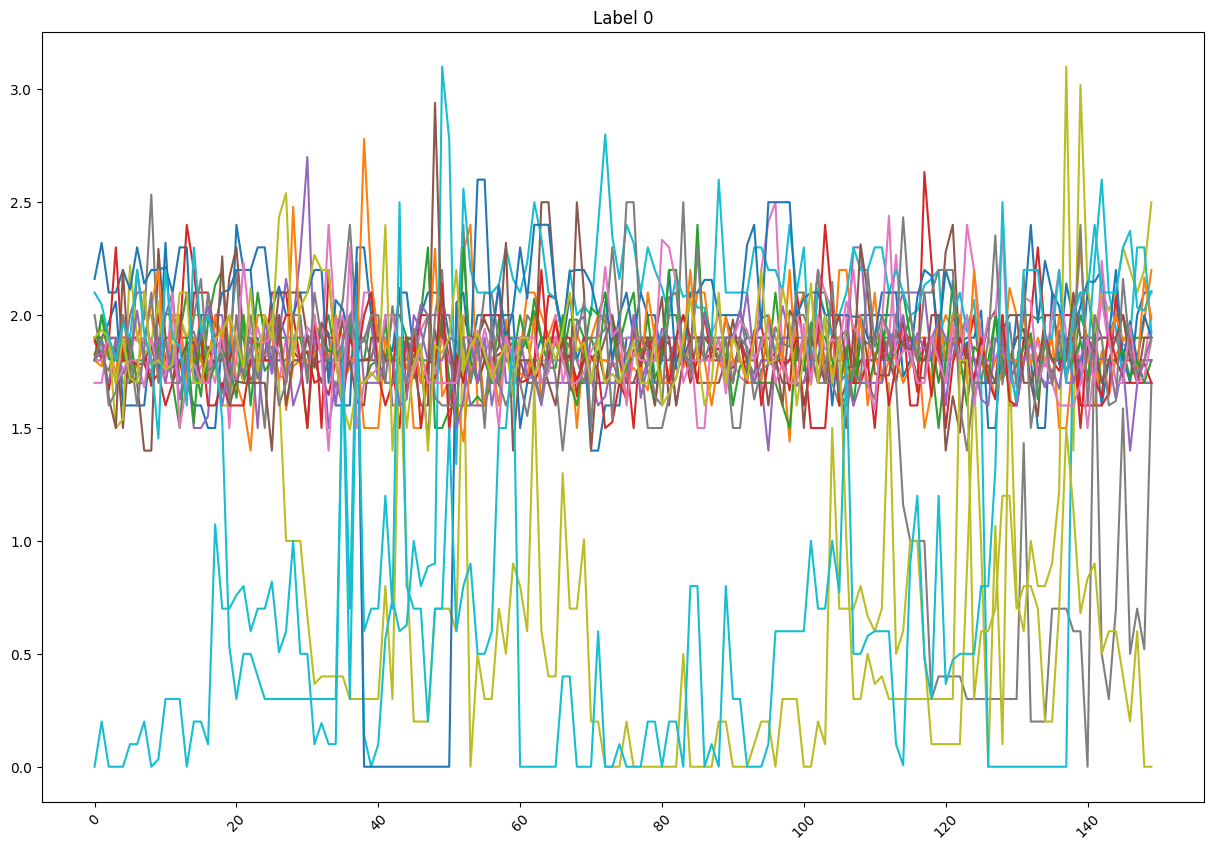

In [69]:
fig = plt.figure(figsize=(15, 10))
for i in range(20):
    plt.plot(group_0[i]['cpu_system'])
    plt.xticks(rotation=45)
plt.title(f"Label 0")
plt.show()

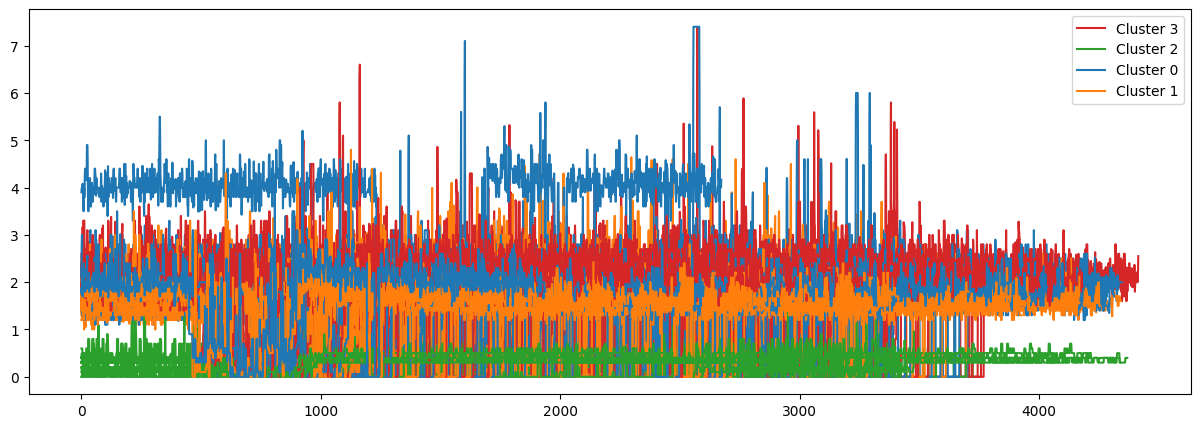

In [ ]:
plt.figure(figsize=(15, 5))
# Track first encounter for each label
seen_labels = set()
for i in range(len(time_series)):
    label = time_series[i]['Cluster'].unique()[0]
    if label not in seen_labels:
        plt.plot(
            time_series[i]['cpu_system'],
            label=f'Cluster {label}',
            color='C' + str(label)
        )
        seen_labels.add(label)
    else:
        plt.plot(
            time_series[i]['cpu_system'],
            color='C' + str(label)
        )
plt.legend()


In [15]:
# normalization
